<a href="https://colab.research.google.com/github/Sinudeshmukh/Data-Science/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoregressive Integrated Moving Averages

Recall that an <strong>AR(1)</strong> model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

while an <strong>MA(1)</strong> model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = \mu + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

where $c$ is a constant, $\mu$ is the expectation of $y_{t}$ (often assumed to be zero), $\phi_1$ is the AR lag coefficient, $\theta_1$ (theta-sub-one) is the MA lag coefficient, and $\varepsilon$ (epsilon) is white noise.

An <strong>ARMA(1,1)</strong> model therefore follows

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Augmented Dickey Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
# Load datasets
df1 = pd.read_csv('../DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]  # we only want the first four months
df1

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-04-26,35
1959-04-27,40
1959-04-28,42


In [ ]:
df2 = pd.read_csv('../TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'
df2

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294
...,...
2018-08-01,2127170
2018-09-01,2134172
2018-10-01,2144639


---
# EDA 
---

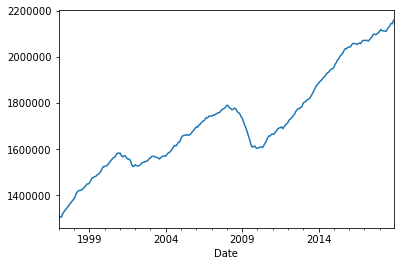

In [ ]:
df2['Inventories'].plot()
plt.show()

### Run an ETS Decomposition (optional)

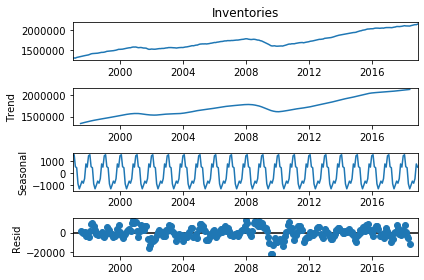

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df2['Inventories'], model='additive')  # model='add' also works
result.plot();

### Check stationarity using Dickey-Fuller Test

In [ ]:
adf_test(df2['Inventories'])

Fail to reject the null hypothesis
Data is non-stationary


### Do first order differencing - (optional)

In [ ]:
from statsmodels.tsa.statespace.tools import diff
df2['d1'] = diff(df2['Inventories'],k_diff=1)
adf_test(df2['d1'])

Reject the null hypothesis
Data is stationary


---
# Build the model
---

In [ ]:
### Use pmdarima to get the p,d,q

### Use <tt>pmdarima.auto_arima</tt> to determine ARIMA Orders

In [ ]:
from pmdarima import auto_arima # for determining ARIMA orders

In [ ]:
#stepwise_fit = auto_arima(df2['Inventories'], start_p=0, start_q=0,
#                          max_p=2, max_q=2, m=12,
#                          seasonal=False,
#                          d=None, trace=True,
#                          error_action='ignore',   # we don't want to know if an order does not work
#                          suppress_warnings=True,  # we don't want convergence warnings
#                          stepwise=True)           # set to stepwise
#
#stepwise_fit.summary()

In [ ]:
stepwise_fit = auto_arima(df2['Inventories'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=5348.037, BIC=5355.181, Time=0.019 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=5399.843, BIC=5410.560, Time=0.052 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=5350.241, BIC=5360.957, Time=0.059 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=5409.217, BIC=5412.789, Time=0.022 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=5378.835, BIC=5393.124, Time=0.279 seconds
Total fit time: 0.439 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Thu, 27 Feb 2020   AIC                           5348.037
Time:                        18:49:38   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Split the data into train/test sets

In [ ]:
len(df2)

264

In [ ]:
# Set one year for testing
train = df2.iloc[:252]
test = df2.iloc[252:]

### Fit an ARIMA(1,1,1) Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(train['Inventories'],order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.395
Method:                       css-mle   S.D. of innovations           4845.028
Date:                Thu, 27 Feb 2020   AIC                           4980.790
Time:                        18:38:13   BIC                           4994.892
Sample:                    02-01-1997   HQIC                          4986.465
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.6171   1344.919      2.378      0.017     561.625    5833.610
ar.L1.D.Inventories     0.9026      0.039     23.013      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.049      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

### Use model to predict

In [ ]:
# Obtain predicted values
start=len(train)
end=len(df2)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions = predictions.rename('ARIMA(1,1,1) Predictions')

In [ ]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Inventories'][i]}")

predicted=2107148.323, expected=2110158
predicted=2110526.189, expected=2118199
predicted=2113886.492, expected=2112427
predicted=2117230.944, expected=2112276
predicted=2120561.09 , expected=2111835
predicted=2123878.322, expected=2109298
predicted=2127183.901, expected=2119618
predicted=2130478.96 , expected=2127170
predicted=2133764.525, expected=2134172
predicted=2137041.521, expected=2144639
predicted=2140310.783, expected=2143001
predicted=2143573.064, expected=2158115


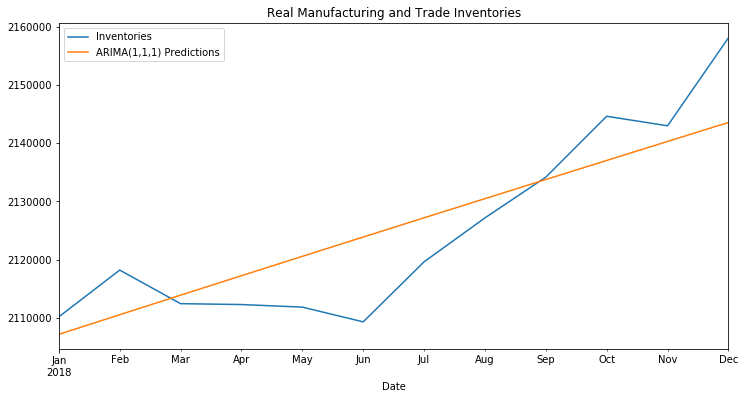

In [ ]:
# Plot predictions against known values
title = 'Real Manufacturing and Trade Inventories'
ylabel='Inventories'
xlabel='' 

test['Inventories'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
plt.show()

### Evaluate the Model

#df['returns'] = df.market_value.pct_change(1)*100

In [ ]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Inventories'], predictions)
error.round(2)

60677264.28

In [ ]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Inventories'], predictions)
error.round(2)

7789.56

In [ ]:
test['Inventories'].mean()

2125075.6666666665

### Retrain the model on the full data, and forecast the future

In [ ]:
model = ARIMA(df2['Inventories'],order=(1,1,1))
results = model.fit()
fcast = results.predict(len(df2),len(df2)+11,typ='levels').rename('ARIMA(1,1,1) Forecast')

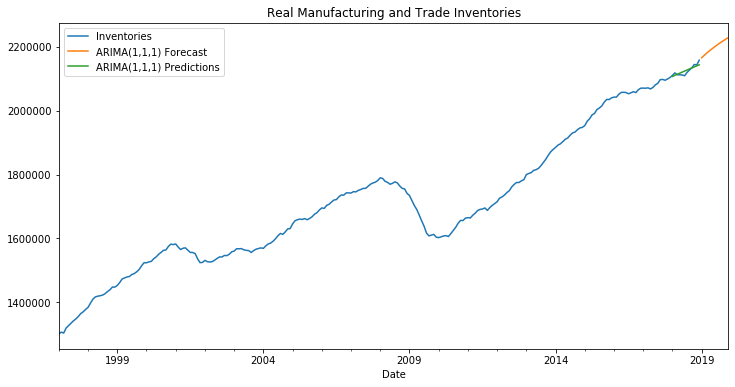

In [ ]:
# Plot predictions against known values
title = 'Real Manufacturing and Trade Inventories'
ylabel='Inventories'
xlabel='Period' 

df2['Inventories'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
predictions.plot(legend=True)
plt.show()